<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/TraversingField.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Create values for simulation board:
import random
import matplotlib.pyplot as plt

def createScene():
  XYColor = []
  for i in range (0,100):
    for j in range (0,100):
      color = ""
      rand = random.randint(1,4)
      if(rand==1):
        color="red"
      elif(rand==2):
        color="yellow"
      elif(rand==3 or rand==4):
        color="green"
      XYColor.append([j,i,color])

  #Show simulation board first:
  import matplotlib.pyplot as plt

  x = []
  y = []
  color = []
  for i in range (0,len(XYColor)):
    x.append(XYColor[i][0])
    y.append(XYColor[i][1])
    color.append(XYColor[i][2])
  return x, y, color

In [ ]:
def reward(color):
  if(color=="red"):
    return -5
  if(color=="yellow"):
    return 1
  if(color=="green"):
    return 4

In [ ]:
def optimize(x,y,color):
  xPos = [0]
  yPos = [random.randint(25,75)]

  rRed = -5
  rGreen = 4
  rYellow = 1
  x=1
  totReward = 0

  for i in range(0,100):
    currentX = xPos[-1]
    currentY = yPos[-1]
    currentColor = color[currentY*100+currentX]

    maxReward = -5
    maxRewardPos = [currentX, currentY]
    if(x%2 == 1):
      n1 = -2
      n2=2
      step=1
    else:
      n1=2
      n2=-2
      step = -1
    for j in range(n1,n2, step):
      # Check if the next position is within bounds
      if((currentY+j)*100+currentX+1 < len(color)):
        next_pos_index = (currentY+j)*100+currentX+1
        if(reward(color[next_pos_index])>=maxReward):
          maxReward = reward(color[next_pos_index])
          maxRewardPos = [currentX+1, currentY+j]
    if(random.random()<0.25):
      maxRewardPos = [currentX+1, currentY+random.randint(-4,4)]
    xPos.append(maxRewardPos[0])
    yPos.append(maxRewardPos[1])
    totReward += reward(color[yPos[-1]*100+xPos[-1]])
    x+=1

  return xPos, yPos, totReward



304


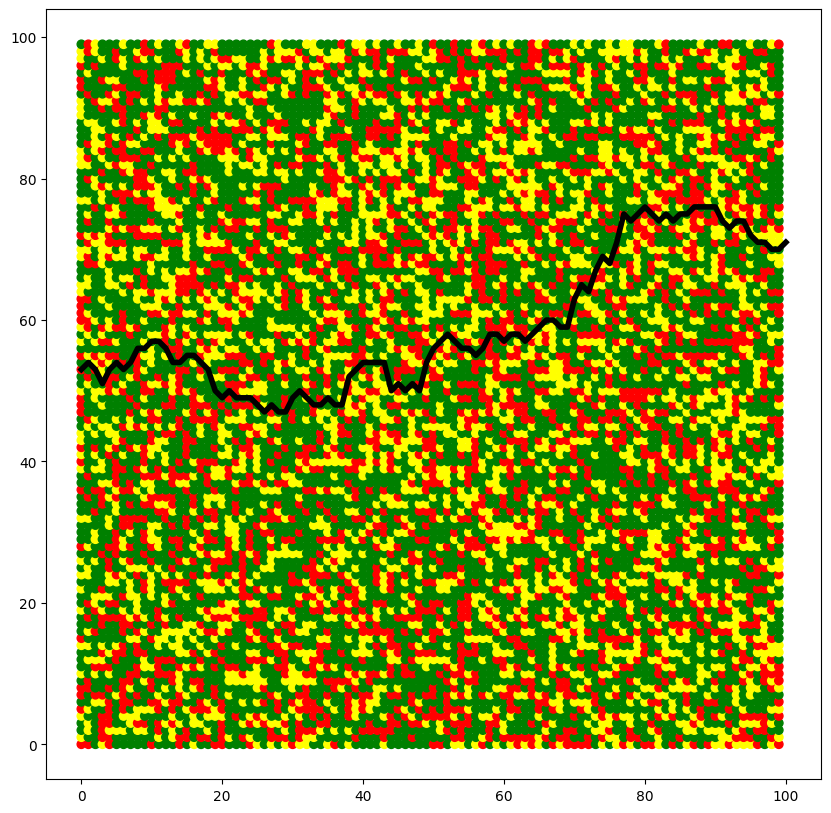

In [ ]:
x,y,color = createScene()
xPos, yPos, total_reward = optimize(x,y,color)

print("\n\n" + str(total_reward))

plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=color)
plt.plot(xPos, yPos, linewidth=4, color = "black")